PROJECT 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

EXERCISE 1
Part 1

In [34]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

The command "sys.float_info" prints out following informations:

    - max: the highest positive floating point (1.798e+308) that can be used to represent a number in Python.
    - max_exp: the highest integer i (1024) such that i-1 in e**i results in a representative (within exisitng range) floating-point in Python.
    - max_10_exp: the highest integer i (308) such that 10**i results in a representative floating-point in Python.
    - min: the smallest (positive) floating point (2.225e-308) that can be used to represent a number in Python.
    - min_exp: the highest negative integer i (-1021) such that i-1 in e**i results in a within-exisitng-range floating-point in Python.
    - min_10_exp: the highest negative integer i (-307) such that 10**i results in a representative floating-point in Python.
    - dig: the highest number of significant figures that a float can have in order to stay uninfluenced when formated (?)
    - mant_dig: number of bits used for the mantissa/significand in the representation of a floating point. 
    - epsilon: The smallest value (2.220e-16) greater than 1 that can be added to 1 in order to generate a new floating point. 
    - radix: provides the base of the floating-point representation. Number 2 indicates they are stored in the most common, binary system. 
    - rounds: Rounding modes of floats in Python. "1" stands for Pythons' standard rounding mode. Mode "1" rounds floats to the nearest value, where ties are being rounded to the nearest even number. 


Part 2

    The value 1.7976931348623157e+308 can be calculated using the following formula:

max = (2-2**(-mant_dig))*2**(max_exp-1)

As explained above, number of bits used for representing the mantissa of a floating point is 53. max_exp stands for the highest integer i (1024) such that i-1 in e**i results in a representative (within exisitng range) floating-point in Python.

    Value 2.2250738585072014e-308:

In a 64 bit floating point representation a number is represented by: 

value = sign * (1 + mantissa) * 2 ** (exponent-bias)

Sign must be "+". Mantissa stays zero to represent the smallest possible number "0". The smallest exponent is 1 (which corresponds to an actual exponent of -1022 when subtracting the bias of 1023). The formula simplifies to:

2.225e-308 = 1 * 2 ** (-1022)

    Value 2.220446049250313e-16:

The smallest possible numerical change that can be made to a number in a 64-bit floating point representation is 2**(-52), which equals 2.22e-16.

Part 3

0.1 + 0.2 won't produce an exact 0.3 output, because both these numbers cannot be represented exactly. Instead, they are approximated:

    0.1 = 0.000110011001100110011001100110011001100110011001100110011001100 = 0.09999999999999999991

    0.2 = 0.0011001100110011001100110011001100110011001100110011001100110011 = 0.19999999999999999999

0.25 + 0.125 will produce an exact 0.375 output, because both these numbers are represented exactly:

    0.25 = 0.01

    0.125 = 0.001

When added together they reproduce an exact number 0.375.

Part 4

In [5]:
i = 0.1 + 0.2
j = 0.3

if i == j:
    print("yes")
else: 
    print("no")

no


Comparing floating points like this isn't reliable, because of the way floating point numbers are represented and added together. However, their addition, for example 0.1 + 0.2 = 0.300...04, lays so close to the real value that their similarity can be aproximated:

In [24]:
def almost(i, j):
    return np.abs(i-j) < 0.0000000001

i = eval(input("First float?: "))
j = eval(input("Second float?: "))

if almost(i, j):
    print("These are equal")
else:
    print("Not equal")

Not equal


EXERCISE 2

Part 1

In [9]:
import numpy as np
x = np.linspace(0,9,10)
y = [0,1,2,3,4,5,6,7,8,9]
np.exp(-x)

array([1.00000000e+00, 3.67879441e-01, 1.35335283e-01, 4.97870684e-02,
       1.83156389e-02, 6.73794700e-03, 2.47875218e-03, 9.11881966e-04,
       3.35462628e-04, 1.23409804e-04])

np.exp() function can be applied both to arrays, such as x, and lists, such as y. The problem occours when we command np.exp() function to automatically change the sign of a list; np.exp(-list). The function cannot change each item of a list automatically, their sign must be changed manually. np.exp() can, however, automatically change signs of every item in an array. This is a good representation of numpys' superior effectivity. 

Normally, I would evaluate a function on all elements/items of a list for example as follows:

In [7]:
for i in y:
    print(np.exp(-i))

1.0
0.36787944117144233
0.1353352832366127
0.049787068367863944
0.01831563888873418
0.006737946999085467
0.0024787521766663585
0.0009118819655545162
0.00033546262790251185
0.00012340980408667956


Part 2

Functions:

    - np.zero(i): creates an array of i zeros.
    - np.ones(i): creates an array of i ones.
    - np.linspace(a, b, c): creates an array of c elements evenly distributed between a and b, including a and b.
    - np.linspace(a, b, c, endpoint = false): first divides np.linspace(a, b, c) in c+1 elements between a and b. Then excludes the last element.
    - vector = np.arange(5) + 1: creates a five elements long array called "vector" [1, 2, 3, 4, 5]. 
    - 2*vector: multiplies each element of "vector" by 2. 

Producing the same output using native Python lists:

In [53]:
"np.zero(20):"
x = []
for i in range(0,20):
    x.append(0)
print(x)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [56]:
"np.ones(20):"
x = []
for i in range(0,20):
    x.append(1)
print(x)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [59]:
"np.linspace(0,10,11)"
x = []
for i in range(0,11):
    x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [71]:
"Last lines"
vector = []
for i in range(0,5):
    vector.append((i+1)*2)
print(vector)

[2, 4, 6, 8, 10]


Part 3

In [14]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

There are 7 non-zero numbers in the array.


The first line of code in the cell below crushes, because "and" operator doesn't evaluate validity ("truthiness") of every element in each array, is_even and is_greater_than_17. Rather, it treats both as single boolean values. This prevents Python from generating a new array where every element of array_of_numbers would be evaluated separately. To perform logical element-wise analysis like in this case, operator "&" is used.

The second line fails, because both arrays on each side of "&" sign lack additional brackets. 

In [16]:
is_even_and_greater_than_17 = is_even and is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This is how such code could look like, in order to work. "and" is replaced by "&", and extra brackets are added.

In [99]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

is_even_and_greater_than_17 = is_even & is_greater_than_17
print((array_of_numbers % 2 == 0) & (array_of_numbers > 17))

There are 7 non-zero numbers in the array.
[False False False False False  True False False]


In [107]:
# Using np.logical_and:

array_of_numbers = np.array([4, 8, 15, 16, 23, 42, 0, 5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)

is_even_and_greater_than_17 = np.logical_and(is_even, is_greater_than_17)
print(is_even_and_greater_than_17)

There are 7 non-zero numbers in the array.
[False False False False False  True False False]


Part 4

Function np.where() indicates which elements of an array fulfill given requirement, in this case x > 17, and where in the array it lays.

In [17]:
np.where(array_of_numbers > 17)[0]

array([4, 5], dtype=int64)

Function np.where(condition, 1, 0) returns an array where elements of the original array get changed into 1 if they fulfill, or into 0 if they don't fulfill the given condition.

In [18]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1, 0, 0])

EXERCISE 3 
Part 1

In [37]:
import matplotlib.pyplot as plt

def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

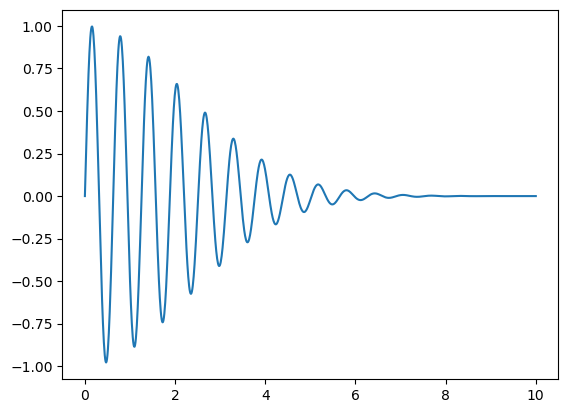

In [38]:
xpoints = np.linspace(0,10,1000)
ypoints = f(xpoints)
# Plot over an arbitrary chosen range 1-10.
plt.plot(xpoints,ypoints)
plt.show()

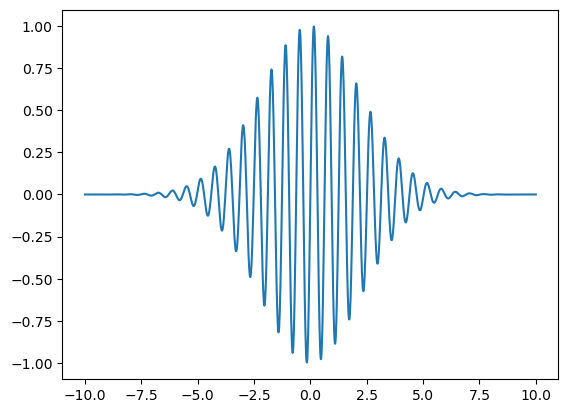

In [39]:
# Plot in the range [-10, 10]:
xpoints = np.linspace(-10,10,1500)
ypoints = f(xpoints)
plt.plot(xpoints,ypoints)
plt.show()

Part 2

In [40]:
def fder(x,a,b):
    return b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x)

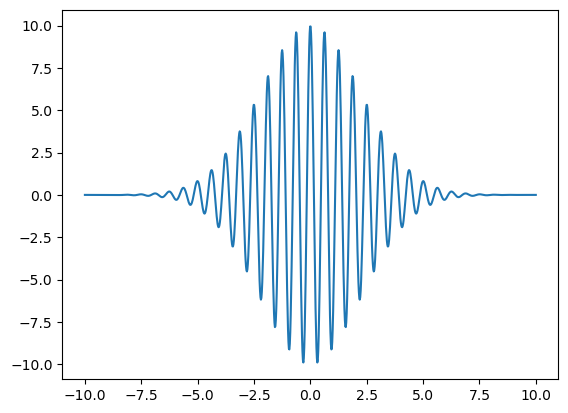

In [41]:
xlist = np.linspace(-10,10,1000)
ylist = fder(xlist, 0.1, 10)
plt.plot(xlist,ylist)
plt.show()

Part 3

Python function that calculates the derivative of provided function using the forward difference method.

In [42]:
def forward_difference_derivative(f, x, h=0.0000001):
     return (f(x + h) - f(x)) / h

x_value = 1
derivative_at_x = forward_difference_derivative(f, x_value)

print(f"The derivative of f(x) at x = {x_value} using forward difference is approximately {derivative_at_x}")

The derivative of f(x) at x = 1 using forward difference is approximately -7.493780418421636


Part 4

Python function that calculates the derivative of provided function using the central difference method.

In [43]:
def central_difference_derivative(f, x, h=0.000001):
    return (f(x + h) - f(x - h)) / (2 * h)

x_value = 1
derivative_at_x = forward_difference_derivative(f, x_value)

print(f"The derivative of f(x) at x = {x_value} using forward difference is approximately {derivative_at_x}")

The derivative of f(x) at x = 1 using forward difference is approximately -7.493780418421636


Part 5

Scatter plots that show the absolute error of the approximation on the y-axis versus the step size.

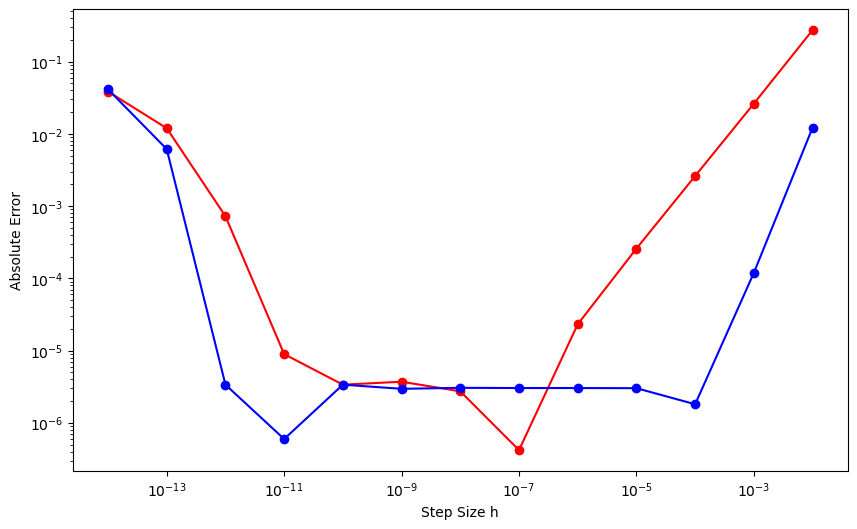

In [44]:
dx = np.logspace(-16,-1,16)

forward_results = forward_difference_derivative(f,1,dx)
real_value = 7.49378
absolute_error1 = []
for i in forward_results:
    absolute_error1.append(np.abs(np.abs(i)-real_value))

central_results = central_difference_derivative(f,1,dx)
real_value = 7.49378
absolute_error2 = []
for i in central_results:
    absolute_error2.append(np.abs(np.abs(i)-real_value))

plt.figure(figsize=(10, 6))
plt.plot(dx[2:15], absolute_error1[2:15], color='red', marker='o')
plt.plot(dx[2:15], absolute_error2[2:15], color='blue', marker='o')
plt.xscale("log")
plt.yscale('log')
plt.xlabel('Step Size h')
plt.ylabel('Absolute Error')
plt.show()

The figure above plots the absolute error between a result achieved through forward/central difference method and the real value of f'(x), with step size h-values on the x-axis and absolute error values on the y-axis. It shows that the smallest absolute error using forward difference method occours at h=10^-7, and at h=10^-9 using central difference method. The smallest absolute error occurs near 10^-8 because this is where truncation error and round-off error balance each other. 

EXERCISE 3

Part II

In [87]:
import numpy as np
import matplotlib.pyplot as plt

class WavePocket:

    def __init__(self,a,b):
        self.a = a
        self.b = b

    def f(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def plot(self, x_min=-10, x_max=10, dx=0.01):
        x = np.arange(x_min, x_max, dx)
        y = self.f(x)
        fig = plt.figure()
        plt.plot(x,y)
        plt.grid()
        plt.show()

    def forward_difference_approximation(self, x, h):
        return (self.f(x + h) - self.f(x)) / h
    
    def central_difference_approximation(self, x, h):
        return (self.f(x+h) - self.f(x-h)) / (2*h)
    
    def exact_derivative(self, x):
        # "Exact analytical derivative"
        return (self.b * np.cos(self.b * x) * np.exp(-self.a * x * x)) - (2 * self.a * x * np.sin(self.b * x) * np.exp(-self.a * x * x))

    def plot_error_vs_step_size(self, x):
        h_values = np.logspace(-16, 0, 17) 
        exact_value = self.exact_derivative(x)
        
        forward_errors = []
        central_errors = []

        for h in h_values:
            forward_approx = self.forward_difference_approximation(x, h)
            central_approx = self.central_difference_approximation(x, h)
            forward_errors.append(abs(forward_approx - exact_value))
            central_errors.append(abs(central_approx - exact_value))
        
        plt.figure(figsize=(10, 6))
        plt.scatter(h_values, forward_errors, label="Forward Difference Error", color='r', marker='o')
        plt.scatter(h_values, central_errors, label="Central Difference Error", color='b', marker='x')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Step size (h)')
        plt.ylabel('Absolute Error')
        plt.title(f'Error in Finite Difference Approximations of f\'(x) at x = {x}')
        plt.grid(True, which="both", ls="--")
        plt.legend()
        plt.show()


0.8227663359156917
-0.49225065733419177
-7.467490688372713
-7.493660815401176


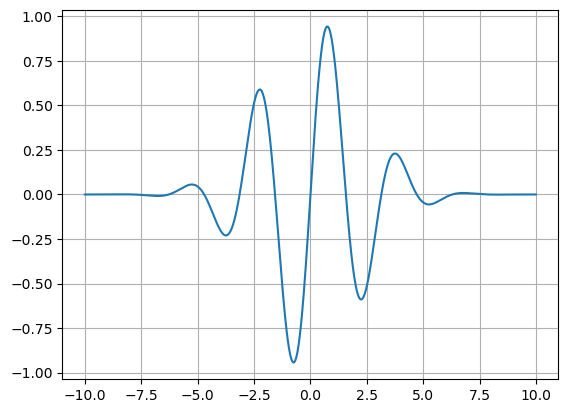

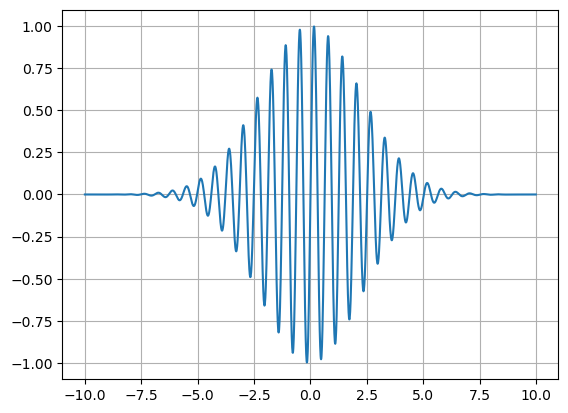

In [88]:
WP1 = WavePocket(0.1,2)
WP2 = WavePocket(0.1,10)
print(WP1.f(1))
print(WP2.f(1))
print(WP2.forward_difference_approximation(1,0.001))
print(WP2.central_difference_approximation(1,0.001))
WP1.plot()
WP2.plot()

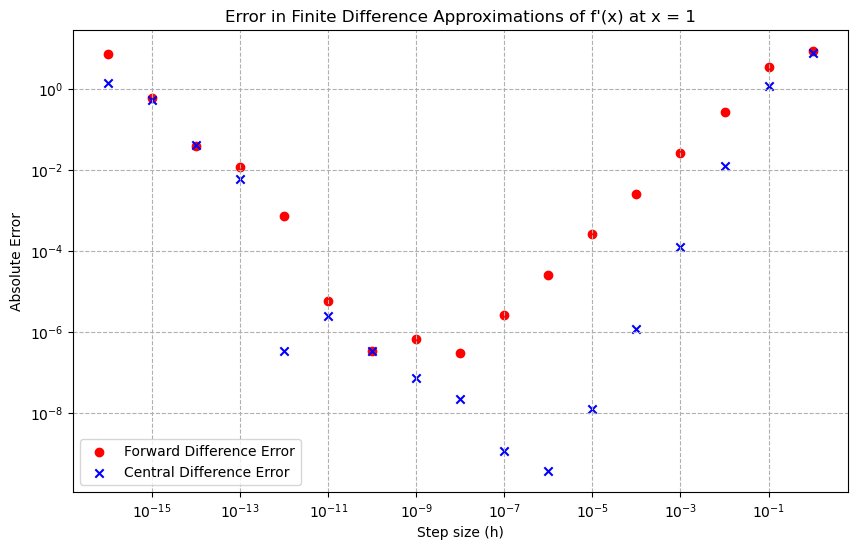

In [90]:
WP2.plot_error_vs_step_size(1)

EXERCISE 4

Part 1

In [1]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
import xarray
import rasterio

bedmap = rh.fetch_bedmap2(datasets=["thickness", "surface", "bed"])
plt.figure(figsize=(8,7))
ax = plt.subplot(111)
surface = bedmap.surface
surface.plot.pcolormesh(ax=ax, cmap=cmocean.cm.ice, cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica")
plt.tight_layout()
plt.show()

c:\Users\pawel\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


AttributeError: module 'xarray' has no attribute 'open_rasterio'

EXERCISE 5

Part 1 and 2

In [36]:
class duple:
    def __init__(self, top, bottom=0):
        self.top = top
        self.bottom = bottom
    
    def __add__(self, d):
        return duple(self.top + d.top, self.bottom + d.bottom)
    
    def __repr__(self):
        return "["+str(self.top)+", "+str(self.bottom)+"]"
    
    def __str__(self):
        return "["+str(self.top)+", "+str(self.bottom)+"]"
    
    def __neg__(self):
        return duple(-self.top, -self.bottom)
    
    def __pos__(self):
        return duple(np.abs(self.top), np.abs(self.bottom))
    
    def __sub__(self, d):
        return duple(self.top - d.top, self.bottom - d.bottom)
    
    def __mul__(self, d):
        return duple(self.top * d.top, self.top * d.bottom + self.bottom * d.top)
    
    def derivate_top(self, h=0.000001):
        return ((self.top + h) - (self.top - h)) / (2 * h)
    
    def derivate_bottom(self, h=0.000001):
        return ((self.bottom + h) - (self.bottom - h)) / (2 * h)
    
    def __truediv__(self, d): # u/v, u'/v' 
        new_top = self.top / d.top
        new_bottom = (self.bottom * d.top - self.top * d.bottom) / (d.top ** 2)
        return duple(new_top, new_bottom)

In [37]:
x = duple(1,2)
y = duple(3,4)
z=x-y
print(z)

[-2, -2]


Functions __repr__ and __str__ are used to convert unreadable strings into nicer readable format. 

Part 3

In [39]:
print(x.top*y.top)
print(x.bottom*y.top+x.top*y.bottom)

3
10


In [40]:
(x.bottom*y.top-x.top*y.bottom)/(y.top*y.top)

0.2222222222222222

Part 4

In [66]:
class dfunction:

    def __init__(self, f, df):
        self.f = f
        self.df = df
    
    def __call__(self,d: duple):
        top_value = self.f(d.top)
        bottom_derivative = d.bottom * self.df(d.top)
        return duple(top_value, bottom_derivative)

In [71]:
import numpy as np

def f(x):
    return np.log(x)
def df(x):
    return 1/x

x = 3.1
One = duple(1.,0.)
X = duple(x,1)
Log = dfunction(f,df)
Exp = dfunction(np.exp, np.exp)
print("auto diff", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)), np.exp(x)/(1+np.exp(x)))

auto diff [3.144063967938574, 0.9568927450589139]
analytical  3.144063967938574 0.9568927450589139


Part 5

In [61]:
np.log(31)

3.4339872044851463